In [10]:
import pandas as pd
from sklearn import *

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

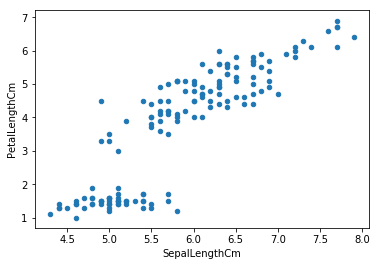

In [5]:
df[features].plot.scatter(0, 1)

In [7]:
X = df[features].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [8]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
y = kmeans.fit_predict(X)

In [9]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2], dtype=int32)

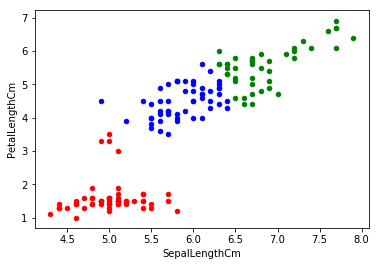

In [12]:
colors = ["red", "green", "blue"]
fig, ax = plt.subplots()
for i in range(k):
    df[y==i][features].plot.scatter(0, 1, color = colors[i], ax = ax)

In [16]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns = features)
centroids

,SepalLengthCm,PetalLengthCm
0,5.005556,1.598148
1,6.858140,5.567442
2,5.873585,4.492453


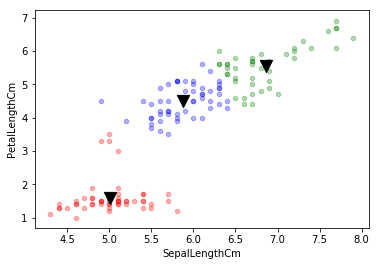

In [20]:
colors = ["red", "green", "blue"]
fig, ax = plt.subplots()
for i in range(k):
    df[y==i][features].plot.scatter(0, 1, color = colors[i], ax = ax, alpha = 0.3)

centroids.plot.scatter(0, 1, ax = ax, marker = "v", s = 150, color = "black")

In [22]:
df["cluster"] = y
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
129,130,7.2,3.0,5.8,1.6,Iris-virginica,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
73,74,6.1,2.8,4.7,1.2,Iris-versicolor,2
105,106,7.6,3.0,6.6,2.1,Iris-virginica,1
113,114,5.7,2.5,5.0,2.0,Iris-virginica,2
121,122,5.6,2.8,4.9,2.0,Iris-virginica,2
29,30,4.7,3.2,1.6,0.2,Iris-setosa,0
30,31,4.8,3.1,1.6,0.2,Iris-setosa,0
21,22,5.1,3.7,1.5,0.4,Iris-setosa,0
38,39,4.4,3.0,1.3,0.2,Iris-setosa,0


In [23]:
df.cluster.value_counts()

0    54
2    53
1    43
Name: cluster, dtype: int64

In [26]:
df["distance"] = 0

for i in range(k): 
    points = X[y==i]
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)
    df.loc[y==i, "distance"] = metrics.euclidean_distances(points, centroid).flatten()

In [27]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance
11,12,4.8,3.4,1.6,0.2,Iris-setosa,0,0.249070
34,35,4.9,3.1,1.5,0.1,Iris-setosa,0,0.139547
13,14,4.3,3.0,1.1,0.1,Iris-setosa,0,0.900617
135,136,7.7,3.0,6.1,2.3,Iris-virginica,1,1.064070
119,120,6.0,2.2,5.0,1.5,Iris-virginica,2,0.326748
132,133,6.4,2.8,5.6,2.2,Iris-virginica,1,0.555427
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0.170454
124,125,6.7,3.3,5.7,2.1,Iris-virginica,1,0.205908
109,110,7.2,3.6,6.1,2.5,Iris-virginica,1,0.513124
144,145,6.7,3.3,5.7,2.5,Iris-virginica,1,0.205908


In [28]:
df.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,0.402361,54
1,0.558198,43
2,0.435640,53


In [29]:
kmeans.inertia_

43.03887066676178

In [30]:
(df.distance ** 2).sum()

43.03887066676177

In [32]:
scores = {}
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    scores[k] = kmeans.inertia_

Text(0, 0.5, 'Inertia')

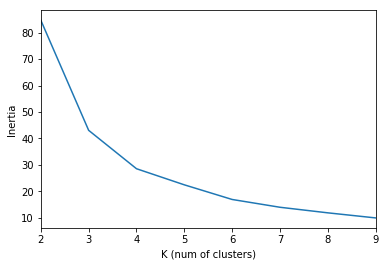

In [34]:
pd.Series(scores).plot()
plt.xlabel("K (num of clusters)")
plt.ylabel("Inertia")